# Chain Non-$n$-Locality Robustness to Single-Qubit Noise

This notebook plots data pertaining to a single noisy link in a chain network.

In [1]:
from context import QNetOptimizer as QNopt
from context import utilities

import matplotlib.pyplot as plt
from pennylane import numpy as np
import re

## Loading Data

### Loading Files for Depolarizing Noise

In [2]:
dep_in_local_rot_n2_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/inside/", r".*_local_rot_n-2_.*"
)
print("num in local_rot files : ", len(dep_in_local_rot_n2_files))

dep_out_local_rot_n2_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/outside/", r".*_local_rot_n-2_.*"
)
print("num out local_rot files : ", len(dep_out_local_rot_n2_files))

dep_in_local_rot_n3_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/inside/", r".*_local_rot_n-3_.*"
)
print("num in local_rot files : ", len(dep_in_local_rot_n3_files))

dep_out_local_rot_n3_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/outside/", r".*_local_rot_n-3_.*"
)
print("num out local_rot files : ", len(dep_out_local_rot_n3_files))


dep_in_bell_n2_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/inside/", r".*_bell_n-2_.*"
)
print("num in bell files : ", len(dep_in_bell_n2_files))

dep_out_bell_n2_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/outside/", r".*_bell_n-2_.*"
)
print("num out bell files : ", len(dep_out_bell_n2_files))

dep_in_bell_n3_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/inside/", r".*_bell_n-3_.*"
)
print("num in bell files : ", len(dep_in_bell_n3_files))
dep_out_bell_n3_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/outside/", r".*_bell_n-3_.*"
)
print("num out bell files : ", len(dep_out_bell_n3_files))

dep_in_arb_n2_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/inside/", r".*_arb_n-2_.*"
)
print("num in arb files : ", len(dep_in_arb_n2_files))

dep_out_arb_n2_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/outside/", r".*_arb_n-2_.*"
)
print("num out arb files : ", len(dep_out_arb_n2_files))

dep_in_arb_n3_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/inside/", r".*_arb_n-3_.*"
)
print("num in arb files : ", len(dep_in_arb_n3_files))
dep_out_arb_n3_files = utilities.get_data_files(
    "../../script/data/chain_n-local_1-qubit_depolarizing/outside/", r".*_arb_n-3_.*"
)
print("num out arb files : ", len(dep_out_arb_n3_files))

num in local_rot files :  1
num out local_rot files :  9
num in local_rot files :  1
num out local_rot files :  7
num in bell files :  1
num out bell files :  3
num in bell files :  1
num out bell files :  3
num in arb files :  1
num out arb files :  7
num in arb files :  1
num out arb files :  6


## Loading Files for Amplitude Damping

In [3]:
amp_dir_inside = "../../script/data/chain_n-local_1-qubit_amplitude_damping/inside/"
amp_dir_outside = "../../script/data/chain_n-local_1-qubit_amplitude_damping/outside/"

local_rot_regex = lambda n: r".*_local_rot_n-" + re.escape(str(n)) + r"_.*"
bell_regex = lambda n: r".*_bell_n-" + re.escape(str(n)) + r"_.*"
arb_regex = lambda n: r".*_arb_n-" + re.escape(str(n)) + r"_.*"

amp_in_local_rot_files = [
    utilities.get_data_files(amp_dir_inside, local_rot_regex(n))
    for n in range(2,8)
]
amp_in_bell_files = [
    utilities.get_data_files(amp_dir_inside, bell_regex(n))
    for n in range(2,8)
]
amp_in_arb_files = [
    utilities.get_data_files(amp_dir_inside, arb_regex(n))
    for n in range(2,8)
]
amp_out_local_rot_files = [
    utilities.get_data_files(amp_dir_outside, local_rot_regex(n))
    for n in range(2,8)
]
amp_out_bell_files = [
    utilities.get_data_files(amp_dir_outside, bell_regex(n))
    for n in range(2,8)
]
amp_out_arb_files = [
    utilities.get_data_files(amp_dir_outside, arb_regex(n))
    for n in range(2,8)
]

for i in range(6):
    print("\nn : ", i + 2)
    print("num in local_rot files : ", len(amp_in_local_rot_files[i]))
    print("num out local_rot files : ", len(amp_out_local_rot_files[i]))
    
    print("num in bell files : ", len(amp_in_bell_files[i]))
    print("num out bell files : ", len(amp_out_bell_files[i]))
    
    print("num in arb files : ", len(amp_in_arb_files[i]))
    print("num out arb files : ", len(amp_out_arb_files[i]))



n :  2
num in local_rot files :  6
num out local_rot files :  14
num in bell files :  6
num out bell files :  12
num in arb files :  6
num out arb files :  13

n :  3
num in local_rot files :  6
num out local_rot files :  11
num in bell files :  6
num out bell files :  12
num in arb files :  6
num out arb files :  10

n :  4
num in local_rot files :  3
num out local_rot files :  3
num in bell files :  3
num out bell files :  3
num in arb files :  3
num out arb files :  3

n :  5
num in local_rot files :  3
num out local_rot files :  3
num in bell files :  3
num out bell files :  3
num in arb files :  3
num out arb files :  3

n :  6
num in local_rot files :  3
num out local_rot files :  3
num in bell files :  3
num out bell files :  3
num in arb files :  3
num out arb files :  3

n :  7
num in local_rot files :  3
num out local_rot files :  3
num in bell files :  3
num out bell files :  3
num in arb files :  2
num out arb files :  3


## Loading Phase Damping Data

In [13]:
pha_dir_inside = "../../script/data/chain_n-local_1-qubit_phase_damping/inside/"
pha_dir_outside = "../../script/data/chain_n-local_1-qubit_phase_damping/outside/"

local_rot_regex = lambda n: r".*_local_rot_n-" + re.escape(str(n)) + r"_.*"
bell_regex = lambda n: r".*_bell_n-" + re.escape(str(n)) + r"_.*"
arb_regex = lambda n: r".*_arb_n-" + re.escape(str(n)) + r"_.*"

pha_in_local_rot_files = [
    utilities.get_data_files(pha_dir_inside, local_rot_regex(n))
    for n in range(2,8)
]
pha_in_bell_files = [
    utilities.get_data_files(pha_dir_inside, bell_regex(n))
    for n in range(2,8)
]
pha_in_arb_files = [
    utilities.get_data_files(pha_dir_inside, arb_regex(n))
    for n in range(2,8)
]
pha_out_local_rot_files = [
    utilities.get_data_files(pha_dir_outside, local_rot_regex(n))
    for n in range(2,8)
]
pha_out_bell_files = [
    utilities.get_data_files(pha_dir_outside, bell_regex(n))
    for n in range(2,8)
]
pha_out_arb_files = [
    utilities.get_data_files(pha_dir_outside, arb_regex(n))
    for n in range(2,8)
]

for i in range(6):
    print("\nn : ", i + 2)
    print("num in local_rot files : ", len(pha_in_local_rot_files[i]))
    print("num out local_rot files : ", len(pha_out_local_rot_files[i]))
    
    print("num in bell files : ", len(pha_in_bell_files[i]))
    print("num out bell files : ", len(pha_out_bell_files[i]))
    
    print("num in arb files : ", len(pha_in_arb_files[i]))
    print("num out arb files : ", len(pha_out_arb_files[i]))


n :  2
num in local_rot files :  2
num out local_rot files :  2
num in bell files :  2
num out bell files :  2
num in arb files :  2
num out arb files :  2

n :  3
num in local_rot files :  2
num out local_rot files :  2
num in bell files :  2
num out bell files :  2
num in arb files :  2
num out arb files :  2

n :  4
num in local_rot files :  2
num out local_rot files :  2
num in bell files :  2
num out bell files :  2
num in arb files :  2
num out arb files :  2

n :  5
num in local_rot files :  3
num out local_rot files :  3
num in bell files :  3
num out bell files :  3
num in arb files :  3
num out arb files :  3

n :  6
num in local_rot files :  3
num out local_rot files :  3
num in bell files :  3
num out bell files :  3
num in arb files :  2
num out arb files :  3

n :  7
num in local_rot files :  2
num out local_rot files :  2
num in bell files :  2
num out bell files :  2
num in arb files :  2
num out arb files :  2


## Analyzing Depolarizing Data

In [5]:
dep_in_local_rot_n2 = utilities.analyze_data_one_param_scan(dep_in_local_rot_n2_files)
dep_out_local_rot_n2 = utilities.analyze_data_one_param_scan(dep_out_local_rot_n2_files)
dep_in_bell_n2 = utilities.analyze_data_one_param_scan(dep_in_bell_n2_files)
dep_out_bell_n2 = utilities.analyze_data_one_param_scan(dep_out_bell_n2_files)
dep_in_arb_n2 = utilities.analyze_data_one_param_scan(dep_in_arb_n2_files)
dep_out_arb_n2 = utilities.analyze_data_one_param_scan(dep_out_arb_n2_files)

dep_in_local_rot_n3 = utilities.analyze_data_one_param_scan(dep_in_local_rot_n3_files)
dep_out_local_rot_n3 = utilities.analyze_data_one_param_scan(dep_out_local_rot_n3_files)
dep_in_bell_n3 = utilities.analyze_data_one_param_scan(dep_in_bell_n3_files)
dep_out_bell_n3 = utilities.analyze_data_one_param_scan(dep_out_bell_n3_files)
dep_in_arb_n3 = utilities.analyze_data_one_param_scan(dep_in_arb_n3_files)
dep_out_arb_n3 = utilities.analyze_data_one_param_scan(dep_out_arb_n3_files)

## Analyzing Amplitude Damping Data

In [6]:
amp_in_local_rot_n = [
    utilities.analyze_data_one_param_scan(amp_in_local_rot_files[i])
    for i in range(6)
]
amp_out_local_rot_n = [
    utilities.analyze_data_one_param_scan(amp_out_local_rot_files[i])
    for i in range(6)
]
amp_in_bell_n = [
    utilities.analyze_data_one_param_scan(amp_in_bell_files[i])
    for i in range(6)
]
amp_out_bell_n = [
    utilities.analyze_data_one_param_scan(amp_out_bell_files[i])
    for i in range(6)
]
amp_in_arb_n = [
    utilities.analyze_data_one_param_scan(amp_in_arb_files[i])
    for i in range(6)
]
amp_out_arb_n = [
    utilities.analyze_data_one_param_scan(amp_out_arb_files[i])
    for i in range(6)
]

## Analyzing Phase Damping Data

In [7]:
pha_in_local_rot_n = [
    utilities.analyze_data_one_param_scan(pha_in_local_rot_files[i])
    for i in range(6)
]
pha_out_local_rot_n = [
    utilities.analyze_data_one_param_scan(pha_out_local_rot_files[i])
    for i in range(6)
]
pha_in_bell_n = [
    utilities.analyze_data_one_param_scan(pha_in_bell_files[i])
    for i in range(6)
]
pha_out_bell_n = [
    utilities.analyze_data_one_param_scan(pha_out_bell_files[i])
    for i in range(6)
]
pha_in_arb_n = [
    utilities.analyze_data_one_param_scan(pha_in_arb_files[i])
    for i in range(6)
]
pha_out_arb_n = [
    utilities.analyze_data_one_param_scan(pha_out_arb_files[i])
    for i in range(6)
]

### Plots for Bilocal Case

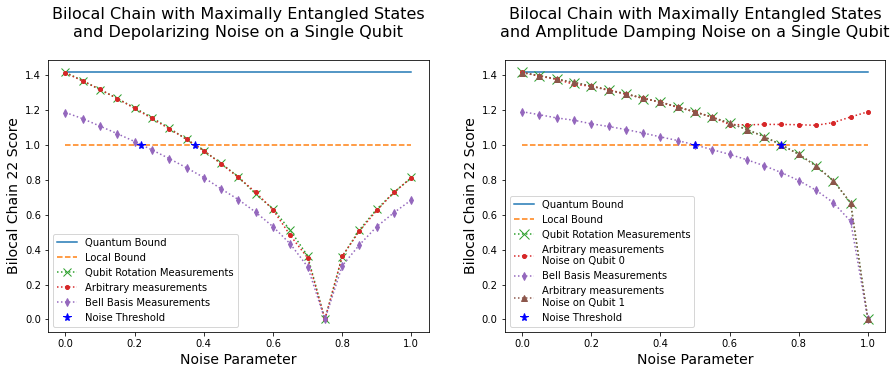

In [8]:
amp_in_local_rot_n2 = amp_in_local_rot_n[0]
amp_out_local_rot_n2 = amp_out_local_rot_n[0]
amp_in_bell_n2 = amp_in_bell_n[0]
amp_out_bell_n2 = amp_out_bell_n[0]
amp_in_arb_n2 = amp_in_arb_n[0]
amp_out_arb_n2 = amp_out_arb_n[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(dep_in_local_rot_n2["noise_params"], [2/np.sqrt(2)]*len(dep_in_local_rot_n2["noise_params"]), label="Quantum Bound")
ax1.plot(dep_in_local_rot_n2["noise_params"], [1]*len(dep_in_local_rot_n2["noise_params"]), "--", label="Local Bound")

ax1.plot(dep_in_local_rot_n2["noise_params"], dep_in_local_rot_n2["max_scores"], ":x", markersize=8, label="Qubit Rotation Measurements")
ax1.plot(dep_in_arb_n2["noise_params"], dep_in_arb_n2["max_scores"], ":.", markersize=8, label="Arbitrary measurements")
ax1.plot(dep_in_bell_n2["noise_params"], dep_in_bell_n2["max_scores"], ":d", markersize=5, label="Bell Basis Measurements")

ax1.plot([(1-1/np.sqrt(2))*3/4, (1-1/2)*3/4], [1,1], "b*", markersize=8, label="Noise Threshold")

ax1.set_title("Bilocal Chain with Maximally Entangled States\nand Depolarizing Noise on a Single Qubit\n", size=16)
ax1.set_ylabel("Bilocal Chain 22 Score", size=14)
ax1.set_xlabel("Noise Parameter", size=14)
ax1.legend()

ax2.plot(amp_out_local_rot_n2["noise_params"], [2/np.sqrt(2)]*len(amp_out_local_rot_n2["noise_params"]), label="Quantum Bound")
ax2.plot(amp_out_local_rot_n2["noise_params"], [1]*len(amp_out_local_rot_n2["noise_params"]), "--", label="Local Bound")

ax2.plot(amp_out_local_rot_n2["noise_params"], amp_out_local_rot_n2["max_scores"], ":x", markersize=10, label="Qubit Rotation Measurements")

ax2.plot(amp_out_arb_n2["noise_params"], amp_out_arb_n2["max_scores"], ":.", markersize=8, label="Arbitrary measurements\nNoise on Qubit 0")

ax2.plot(amp_out_bell_n2["noise_params"], amp_out_bell_n2["max_scores"], ":d", markersize=5, label="Bell Basis Measurements")
ax2.plot(amp_in_arb_n2["noise_params"], amp_in_arb_n2["max_scores"], ":^", markersize=6, label="Arbitrary measurements\nNoise on Qubit 1")


ax2.plot([0.5,0.75], [1,1], "b*", markersize=8, label="Noise Threshold")

ax2.set_title("Bilocal Chain with Maximally Entangled States\nand Amplitude Damping Noise on a Single Qubit\n", size=16)
ax2.set_ylabel("Bilocal Chain 22 Score", size=14)
ax2.set_xlabel("Noise Parameter", size=14)
ax2.legend()

plt.show()

### Plots for Trilocal Case

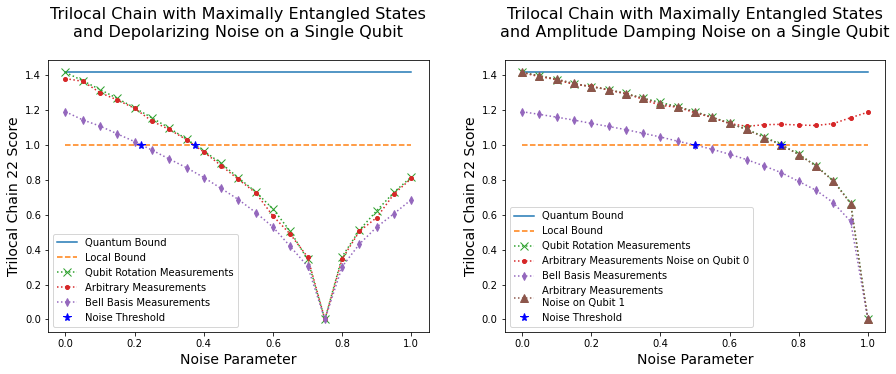

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

amp_in_local_rot_n3 = amp_in_local_rot_n[1]
amp_out_local_rot_n3 = amp_out_local_rot_n[1]
amp_in_bell_n3 = amp_in_bell_n[1]
amp_out_bell_n3 = amp_out_bell_n[1]
amp_in_arb_n3 = amp_in_arb_n[1]
amp_out_arb_n3 = amp_out_arb_n[1]

ax1.plot(dep_in_local_rot_n3["noise_params"], [2/np.sqrt(2)]*len(dep_in_local_rot_n3["noise_params"]), label="Quantum Bound")
ax1.plot(dep_in_local_rot_n3["noise_params"], [1]*len(dep_in_local_rot_n3["noise_params"]), "--", label="Local Bound")

ax1.plot(dep_in_local_rot_n3["noise_params"], dep_in_local_rot_n3["max_scores"], ":x", markersize=8, label="Qubit Rotation Measurements")
ax1.plot(dep_in_arb_n3["noise_params"], dep_in_arb_n3["max_scores"], ":.", markersize=8, label="Arbitrary Measurements")
ax1.plot(dep_in_bell_n3["noise_params"], dep_in_bell_n3["max_scores"], ":d", markersize=5, label="Bell Basis Measurements")

ax1.plot([(1-1/np.sqrt(2))*3/4,(1-1/2)*3/4], [1,1], "b*", markersize=8, label="Noise Threshold")

ax1.set_title("Trilocal Chain with Maximally Entangled States\nand Depolarizing Noise on a Single Qubit\n", size=16)
ax1.set_ylabel("Trilocal Chain 22 Score", size=14)
ax1.set_xlabel("Noise Parameter", size=14)
ax1.legend()

ax2.plot(amp_out_local_rot_n3["noise_params"], [2/np.sqrt(2)]*len(amp_out_local_rot_n3["noise_params"]), label="Quantum Bound")
ax2.plot(amp_out_local_rot_n3["noise_params"], [1]*len(amp_out_local_rot_n3["noise_params"]), "--", label="Local Bound")

ax2.plot(amp_out_local_rot_n3["noise_params"], amp_out_local_rot_n3["max_scores"], ":x", markersize=8, label="Qubit Rotation Measurements")

ax2.plot(amp_out_arb_n3["noise_params"], amp_out_arb_n3["max_scores"], ":.", markersize=8, label=r"Arbitrary Measurements Noise on Qubit 0")
ax2.plot(amp_out_bell_n3["noise_params"], amp_out_bell_n3["max_scores"], ":d", markersize=5, label="Bell Basis Measurements")

ax2.plot(amp_in_arb_n3["noise_params"], amp_in_arb_n3["max_scores"], ":^", markersize=8, label="Arbitrary Measurements\nNoise on Qubit 1")


ax2.plot([0.5,0.75], [1,1], "b*", markersize=8, label="Noise Threshold")


ax2.set_title("Trilocal Chain with Maximally Entangled States\nand Amplitude Damping Noise on a Single Qubit\n", size=16)
ax2.set_ylabel("Trilocal Chain 22 Score", size=14)
ax2.set_xlabel("Noise Parameter", size=14)
ax2.legend()

plt.show()

## Plots for $n$-Local Chains

## Amplitude Damping Chains

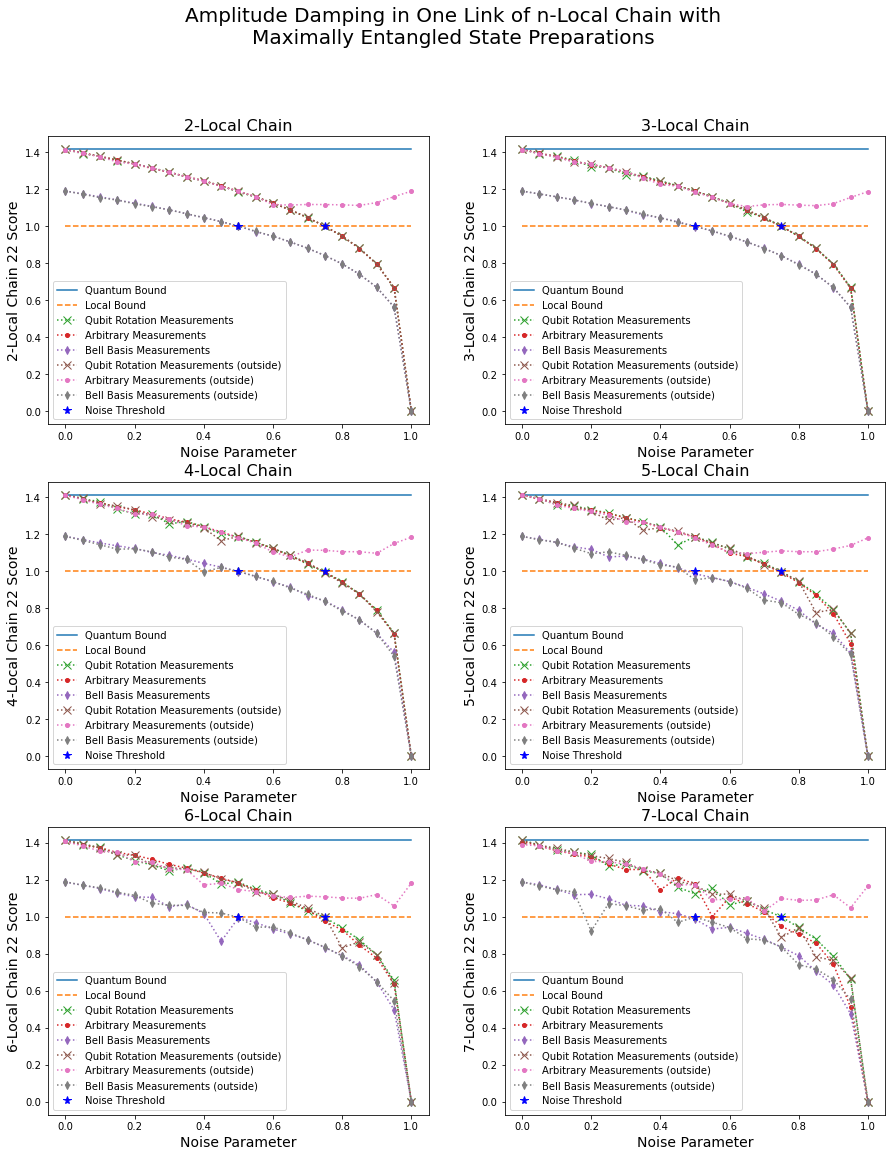

In [12]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(15,18))

fig.suptitle("Amplitude Damping in One Link of n-Local Chain with\nMaximally Entangled State Preparations", size=20)

for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6]):
    
    n = i + 2
    
    amp_in_local_rot = amp_in_local_rot_n[i]
    amp_out_local_rot = amp_out_local_rot_n[i]
    amp_in_bell = amp_in_bell_n[i]
    amp_out_bell = amp_out_bell_n[i]
    amp_in_arb = amp_in_arb_n[i]
    amp_out_arb = amp_out_arb_n[i]
    
    ax.plot(amp_in_local_rot["noise_params"], [2/np.sqrt(2)]*len(amp_in_local_rot["noise_params"]), label="Quantum Bound")
    ax.plot(amp_in_local_rot["noise_params"], [1]*len(amp_in_local_rot["noise_params"]), "--", label="Local Bound")

    ax.plot(amp_in_local_rot["noise_params"], amp_in_local_rot["max_scores"], ":x", markersize=8, label="Qubit Rotation Measurements")
    ax.plot(amp_in_arb["noise_params"], amp_in_arb["max_scores"], ":.", markersize=8, label="Arbitrary Measurements")
    ax.plot(amp_in_bell["noise_params"], amp_in_bell["max_scores"], ":d", markersize=5, label="Bell Basis Measurements")
    ax.plot(amp_out_local_rot["noise_params"], amp_out_local_rot["max_scores"], ":x", markersize=8, label="Qubit Rotation Measurements (outside)")
    ax.plot(amp_out_arb["noise_params"], amp_out_arb["max_scores"], ":.", markersize=8, label="Arbitrary Measurements (outside)")
    ax.plot(amp_out_bell["noise_params"], amp_out_bell["max_scores"], ":d", markersize=5, label="Bell Basis Measurements (outside)")
    
    ax.plot([0.5,0.75], [1,1], "b*", markersize=8, label="Noise Threshold")

    ax.set_title(str(n) + "-Local Chain", size=16)
    ax.set_ylabel(str(n) + "-Local Chain 22 Score", size=14)
    ax.set_xlabel("Noise Parameter", size=14)
    ax.legend()

## Phase Damping

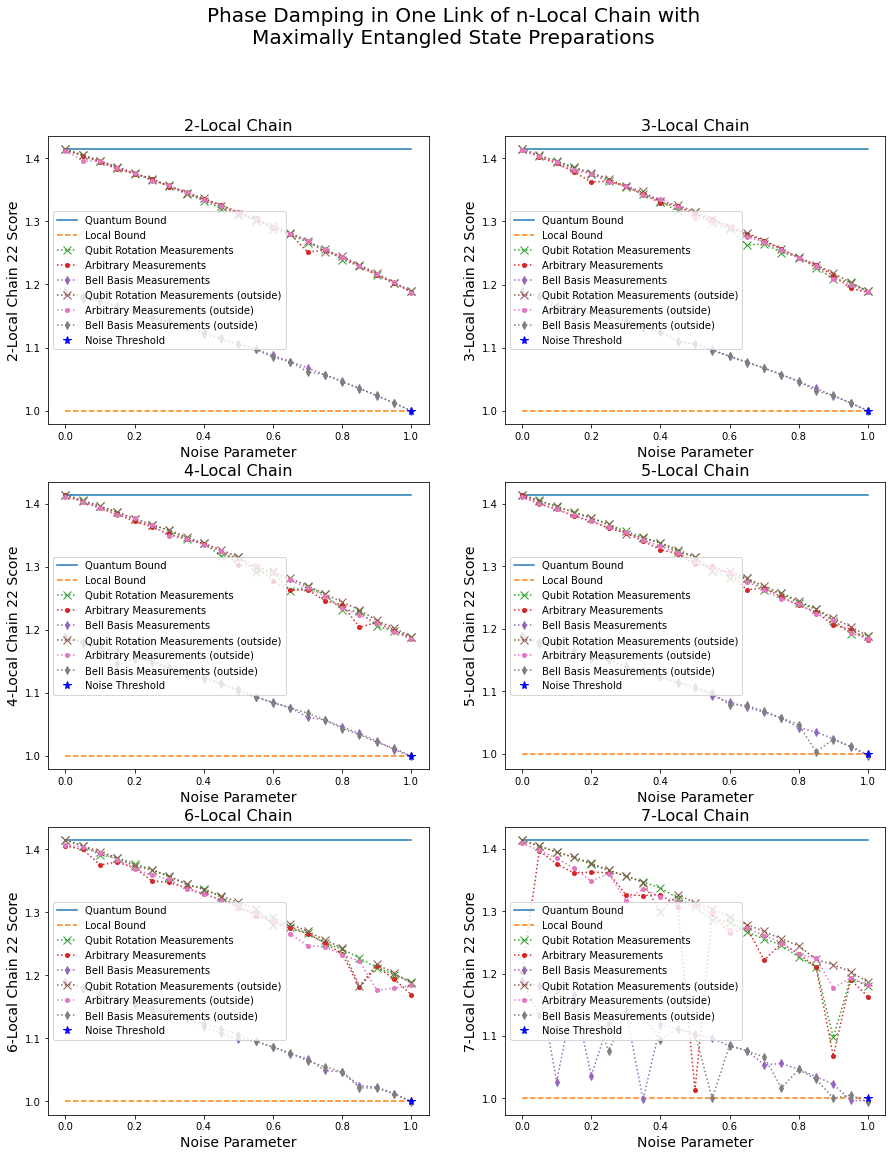

In [14]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(15,18))

fig.suptitle("Phase Damping in One Link of n-Local Chain with\nMaximally Entangled State Preparations", size=20)

for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6]):
    
    n = i + 2
    
    pha_in_local_rot = pha_in_local_rot_n[i]
    pha_out_local_rot = pha_out_local_rot_n[i]
    pha_in_bell = pha_in_bell_n[i]
    pha_out_bell = pha_out_bell_n[i]
    pha_in_arb = pha_in_arb_n[i]
    pha_out_arb = pha_out_arb_n[i]
    
    ax.plot(pha_in_local_rot["noise_params"], [2/np.sqrt(2)]*len(pha_in_local_rot["noise_params"]), label="Quantum Bound")
    ax.plot(pha_in_local_rot["noise_params"], [1]*len(pha_in_local_rot["noise_params"]), "--", label="Local Bound")

    ax.plot(pha_in_local_rot["noise_params"], pha_in_local_rot["max_scores"], ":x", markersize=8, label="Qubit Rotation Measurements")
    ax.plot(pha_in_arb["noise_params"], pha_in_arb["max_scores"], ":.", markersize=8, label="Arbitrary Measurements")
    ax.plot(pha_in_bell["noise_params"], pha_in_bell["max_scores"], ":d", markersize=5, label="Bell Basis Measurements")
    ax.plot(pha_out_local_rot["noise_params"], pha_out_local_rot["max_scores"], ":x", markersize=8, label="Qubit Rotation Measurements (outside)")
    ax.plot(pha_out_arb["noise_params"], pha_out_arb["max_scores"], ":.", markersize=8, label="Arbitrary Measurements (outside)")
    ax.plot(pha_out_bell["noise_params"], pha_out_bell["max_scores"], ":d", markersize=5, label="Bell Basis Measurements (outside)")
    
    ax.plot([1], [1], "b*", markersize=8, label="Noise Threshold")

    ax.set_title(str(n) + "-Local Chain", size=16)
    ax.set_ylabel(str(n) + "-Local Chain 22 Score", size=14)
    ax.set_xlabel("Noise Parameter", size=14)
    ax.legend()

## Verifying Similarities Between Inside and Outside Channel Application

We find that inside versus outside application of the channel does not matter unless one considers the amplitude damping channel with arbitrary measurements.

In [ ]:
len([filter(
    lambda x: x == False,
    [np.isclose(dep_in_local_rot_n2["max_scores"][i], dep_out_local_rot_n2["max_scores"][i], atol=0.01) for i in range(21)]
)])



In [ ]:
[np.isclose(dep_out_local_rot_n3["max_scores"][i], dep_in_local_rot_n3["max_scores"][i], atol=0.01) for i in range(21)]

In [ ]:
[np.isclose(dep_out_arb_n2["max_scores"][i], dep_in_arb_n2["max_scores"][i], atol=0.01) for i in range(21)]

In [ ]:
[np.isclose(dep_in_arb_n3["max_scores"][i], dep_out_arb_n3["max_scores"][i], atol=0.01) for i in range(21)]

In [ ]:
[np.isclose(dep_in_bell_n2["max_scores"][i], dep_out_bell_n2["max_scores"][i], atol=0.01) for i in range(21)]

In [ ]:
[np.isclose(dep_in_bell_n3["max_scores"][i], dep_out_bell_n3["max_scores"][i], atol=0.01) for i in range(21)]

In [ ]:
# [np.isclose(amp_in_local_rot_n2["max_scores"][i], amp_out_local_rot_n2["max_scores"][i], atol=0.01) for i in range(21)]
# [np.isclose(amp_in_local_rot_n3["max_scores"][i], amp_out_local_rot_n3["max_scores"][i], atol=0.01) for i in range(21)]
# [np.isclose(amp_in_bell_n2["max_scores"][i], amp_out_bell_n2["max_scores"][i], atol=0.01) for i in range(21)]
# [np.isclose(amp_in_bell_n3["max_scores"][i], amp_out_bell_n3["max_scores"][i], atol=0.01) for i in range(21)]
# [np.isclose(amp_in_arb_n2["max_scores"][i], amp_out_arb_n2["max_scores"][i], atol=0.05) for i in range(21)]
# [np.isclose(amp_in_arb_n3["max_scores"][i], amp_out_arb_n3["max_scores"][i], atol=0.01) for i in range(21)]

In [ ]:
a = r"test_" + re.escape(str(5)) + "_end"

In [ ]:
a